#Theoratical question



1. **Can we use Bagging for regression problems?**
   Yes, Bagging works for regression by training multiple regressors and averaging their outputs to give the final prediction.

2. **Difference between multiple model training and single model training:**
   Single model uses the entire data once. Multiple model training uses subsets or different approaches to create and combine many models.

3. **Feature randomness in Random Forest:**
   Random Forest picks a random subset of features at each tree split, making trees diverse and reducing overfitting.

4. **What is OOB (Out-of-Bag) Score?**
   It’s the accuracy measured using data not included in a tree’s training set—like a built-in test set for evaluation.

5. **How to measure feature importance in Random Forest?**
   It measures how much a feature helps reduce impurity or affects prediction accuracy when values are shuffled.

6. **Working principle of a Bagging Classifier:**
   It trains multiple classifiers on random subsets (bootstrapped data) and takes a majority vote for final classification.

7. **Evaluating Bagging Classifier performance:**
   Use accuracy, precision, recall, F1-score, or OOB score if enabled to assess how well it predicts.

8. **How does a Bagging Regressor work?**
   It trains multiple regressors on bootstrapped data and averages their predictions for the final result.

9. **Main advantage of ensemble techniques:**
   They improve model accuracy, reduce overfitting, and work better than individual models in most cases.

10. **Main challenge of ensemble methods:**
    They are complex, need more computation, and are harder to interpret than single models.

11. **Key idea behind ensemble techniques:**
    Combine predictions from multiple models to create a stronger, more accurate one.

12. **What is a Random Forest Classifier?**
    It’s an ensemble of decision trees using Bagging and feature randomness, predicting via majority voting.

13. **Main types of ensemble techniques:**
    Bagging, Boosting, and Stacking are the three major types, differing in how models are combined.

14. **What is ensemble learning in ML?**
    It’s a technique where several models work together to improve overall prediction performance.

15. **When to avoid ensemble methods?**
    Avoid them with small datasets, when speed or model interpretability is more important.

16. **How Bagging reduces overfitting:**
    It reduces variance by averaging models trained on different data, making the overall model more stable.

17. **Why Random Forest > single Decision Tree?**
    It handles noise and overfitting better by averaging predictions from many diverse trees.

18. **Role of bootstrap sampling in Bagging:**
    It creates diverse training sets by randomly sampling with replacement, helping build varied models.

19. **Real-world applications of ensemble techniques:**
    Used in fraud detection, medical diagnosis, stock market prediction, and recommendation systems.

20. **Difference between Bagging and Boosting:**
    Bagging trains models independently and reduces variance. Boosting trains models sequentially to fix errors and reduce bias.



#Practical questions

In [3]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 1.0


In [4]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=10,
    random_state=42
)

bagging_reg.fit(X_train, y_train)

y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Bagging Regressor Mean Squared Error:", mse)



Bagging Regressor Mean Squared Error: 3237.526541353384


In [5]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

feature_importances = rf_clf.feature_importances_

feature_names = breast_cancer_data.feature_names

print("Feature Importance Scores:")
for name, importance in zip(feature_names, feature_importances):
  print(f"{name}: {importance:.4f}")


Feature Importance Scores:
mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [6]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.ensemble import RandomForestRegressor

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)

dt_reg.fit(X_train, y_train)

y_pred_dt = dt_reg.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regressor Mean Squared Error:", mse_dt)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regressor Mean Squared Error:", mse_rf)

print("\nComparison of performance:")
print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Decision Tree Regressor Mean Squared Error: 5697.789473684211
Random Forest Regressor Mean Squared Error: 2859.641982706767

Comparison of performance:
Decision Tree MSE: 5697.7895
Random Forest MSE: 2859.6420


In [7]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

rf_clf_oob = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

rf_clf_oob.fit(X_train, y_train)

oob_score = rf_clf_oob.oob_score_
print("\nOut-of-Bag Score for Random Forest Classifier:", oob_score)


Out-of-Bag Score for Random Forest Classifier: 0.006472491909385114


In [8]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.svm import SVC

bagging_clf_svm = BaggingClassifier(
    estimator=SVC(),
    n_estimators=10,
    random_state=42
)

bagging_clf_svm.fit(X_train, y_train)

y_pred_svm = bagging_clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Bagging Classifier with SVM Accuracy:", accuracy_svm)

Bagging Classifier with SVM Accuracy: 0.03007518796992481


In [9]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

n_estimators_list = [10, 50, 100, 200]
accuracy_scores = {}

print("\nComparing Random Forest Classifier Accuracy with different n_estimators:")
for n_estimators in n_estimators_list:
  rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
  rf_clf.fit(X_train, y_train)
  y_pred = rf_clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores[n_estimators] = accuracy
  print(f"  n_estimators = {n_estimators}: Accuracy = {accuracy:.4f}")

print("\nSummary of Accuracy Scores:")
for n_estimators, accuracy in accuracy_scores.items():
  print(f"  {n_estimators} trees: {accuracy:.4f}")


Comparing Random Forest Classifier Accuracy with different n_estimators:
  n_estimators = 10: Accuracy = 0.0000
  n_estimators = 50: Accuracy = 0.0075
  n_estimators = 100: Accuracy = 0.0075
  n_estimators = 200: Accuracy = 0.0075

Summary of Accuracy Scores:
  10 trees: 0.0000
  50 trees: 0.0075
  100 trees: 0.0075
  200 trees: 0.0075


In [10]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf_lr = BaggingClassifier(
    estimator=LogisticRegression(solver='liblinear', random_state=42),
    n_estimators=10,
    random_state=42
)

bagging_clf_lr.fit(X_train, y_train)

y_pred_proba = bagging_clf_lr.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)

print("Bagging Classifier with Logistic Regression AUC Score:", auc_score)

Bagging Classifier with Logistic Regression AUC Score: 0.9977954144620812


R² Score: 0.8045734925119942

Feature Importance Scores:
       Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


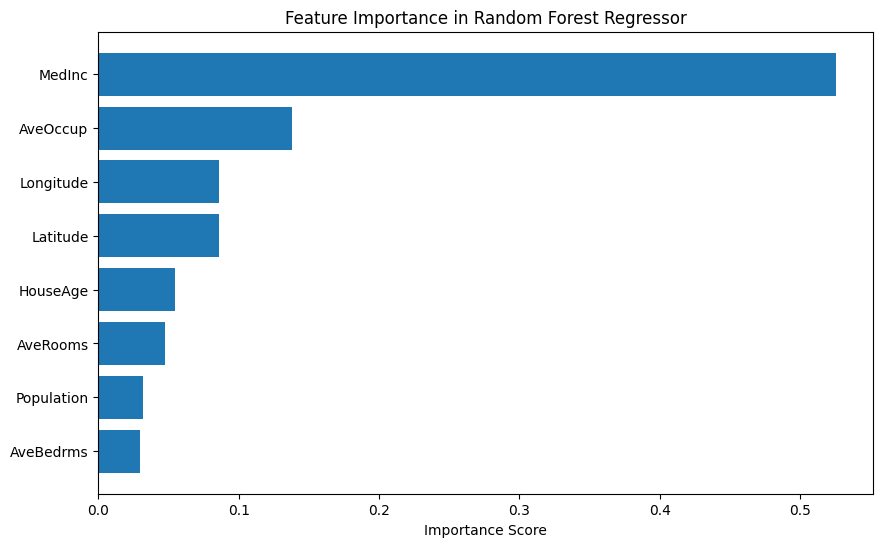

In [12]:
#29. Train a Random Forest Regressor and analyze feature importance scores

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Scores:\n", feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance in Random Forest Regressor")
plt.xlabel("Importance Score")
plt.show()



In [14]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Bagging Classifier Accuracy:", bagging_acc)
print("Random Forest Classifier Accuracy:", rf_acc)


Bagging Classifier Accuracy: 1.0
Random Forest Classifier Accuracy: 1.0


In [15]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest parameters found by GridSearchCV:")
print(best_params)
print("\nBest accuracy score on training data (from GridSearchCV):", best_score)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_tuned)

print("\nAccuracy of the best tuned Random Forest Classifier on the test set:", test_accuracy)



Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best accuracy score on training data (from GridSearchCV): 0.9572468354430379

Accuracy of the best tuned Random Forest Classifier on the test set: 0.9707602339181286


Comparing Bagging Regressor performance with different n_estimators:
  n_estimators = 10: Mean Squared Error = 0.2862
  n_estimators = 50: Mean Squared Error = 0.2579
  n_estimators = 100: Mean Squared Error = 0.2568
  n_estimators = 200: Mean Squared Error = 0.2542
  n_estimators = 500: Mean Squared Error = 0.2527


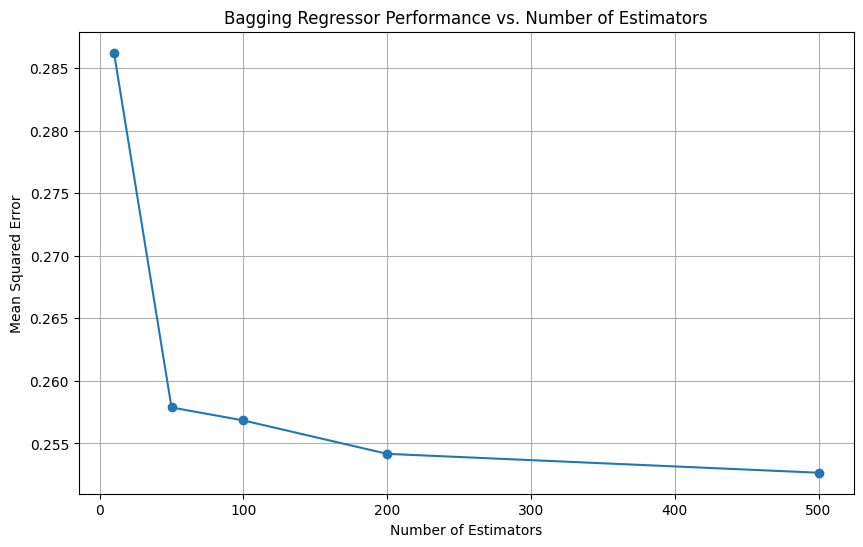


Summary of Mean Squared Error Scores:
  10 estimators: 0.2862
  50 estimators: 0.2579
  100 estimators: 0.2568
  200 estimators: 0.2542
  500 estimators: 0.2527


In [16]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance

import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]
mse_scores = {}

print("Comparing Bagging Regressor performance with different n_estimators:")
for n_estimators in n_estimators_list:

  bagging_reg = BaggingRegressor(
      estimator=DecisionTreeRegressor(),
      n_estimators=n_estimators,
      random_state=42
  )

  bagging_reg.fit(X_train, y_train)

  y_pred = bagging_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_scores[n_estimators] = mse
  print(f"  n_estimators = {n_estimators}: Mean Squared Error = {mse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(list(mse_scores.keys()), list(mse_scores.values()), marker='o')
plt.title("Bagging Regressor Performance vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print("\nSummary of Mean Squared Error Scores:")
for n_estimators, mse in mse_scores.items():
  print(f"  {n_estimators} estimators: {mse:.4f}")

In [18]:
#33. Train a Random Forest Classifier and analyze misclassified samples

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Actual")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

misclassified_indices = y_test[y_test != y_pred].index
misclassified_df = X_test.loc[misclassified_indices]
misclassified_df["Actual"] = y_test.loc[misclassified_indices]
misclassified_df["Predicted"] = y_pred[misclassified_indices]

print("\nMisclassified Samples:")
print(misclassified_df)


Random Forest Classifier Accuracy: 1.0

Misclassified Samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), Actual, Predicted]
Index: []


In [19]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Single Decision Tree Classifier Accuracy:", accuracy_dt)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred_bagging = bagging_clf.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

print("\nComparison of performance:")
print(f"Single Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Single Decision Tree Classifier Accuracy: 1.0
Bagging Classifier Accuracy: 1.0

Comparison of performance:
Single Decision Tree Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000


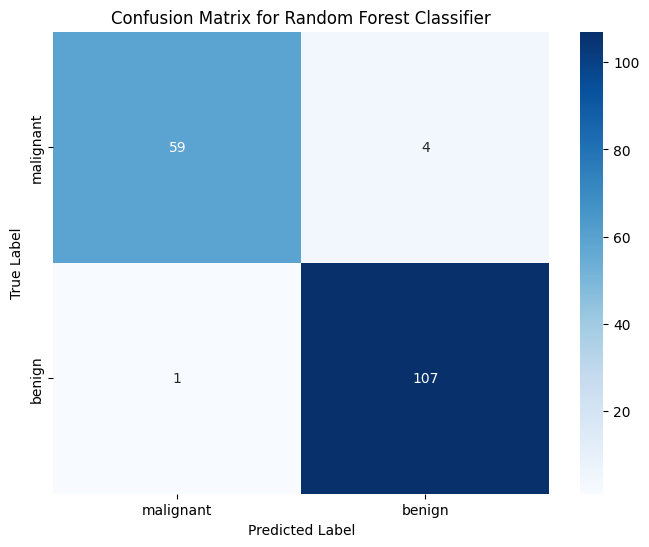

In [31]:
#35. Train a Random Forest Classifier and visualize the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target
class_names = breast_cancer_data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

final_estimator = LogisticRegression(random_state=42)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

print("\nComparison of Accuracies:")
print(f"Decision Tree: {accuracy_dt:.4f}")
print(f"SVM: {accuracy_svm:.4f}")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"Stacking Classifier: {accuracy_stacking:.4f}")


Stacking Classifier Accuracy: 1.0
Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0
Logistic Regression Accuracy: 1.0

Comparison of Accuracies:
Decision Tree: 1.0000
SVM: 1.0000
Logistic Regression: 1.0000
Stacking Classifier: 1.0000


In [22]:
#37. Train a Random Forest Classifier and print the top 5 most important features

import pandas as pd

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target
feature_names = breast_cancer_data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

feature_importances = rf_clf.feature_importances_

importance_series = pd.Series(feature_importances, index=feature_names)

sorted_importance = importance_series.sort_values(ascending=False)

print("\nTop 5 Most Important Features:")
print(sorted_importance.head(5))


Top 5 Most Important Features:
mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


In [23]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.metrics import precision_score, recall_score, f1_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nBagging Classifier Performance Metrics:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")



Bagging Classifier Performance Metrics:
  Precision: 0.9626
  Recall:    0.9537
  F1-score:  0.9581



Comparing Random Forest Classifier Accuracy with different max_depth:
  max_depth = 1: Accuracy = 0.9591
  max_depth = 5: Accuracy = 0.9649
  max_depth = 10: Accuracy = 0.9708
  max_depth = 20: Accuracy = 0.9708
  max_depth = None: Accuracy = 0.9708


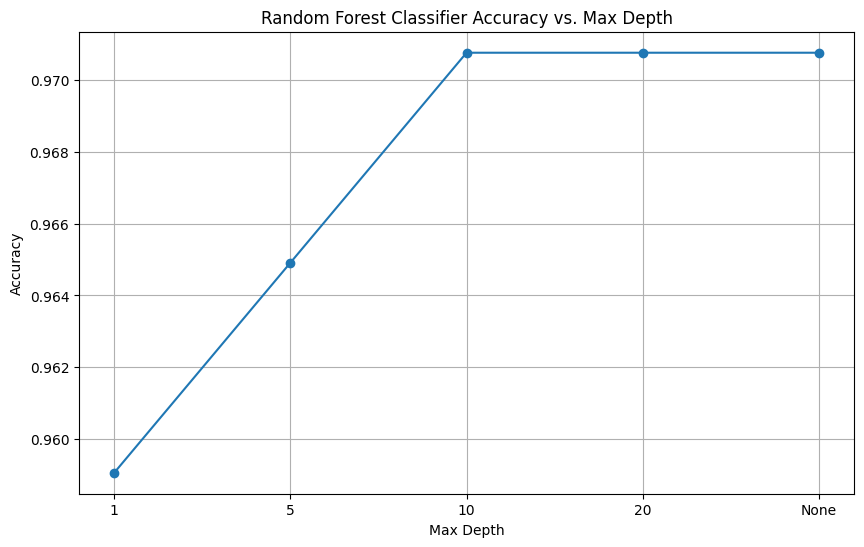


Summary of Accuracy Scores by Max Depth:
  max_depth = 1: 0.9591
  max_depth = 5: 0.9649
  max_depth = 10: 0.9708
  max_depth = 20: 0.9708
  max_depth = None: 0.9708


In [24]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

import matplotlib.pyplot as plt

max_depth_list = [1, 5, 10, 20, None]
accuracy_scores_depth = {}

print("\nComparing Random Forest Classifier Accuracy with different max_depth:")
for depth in max_depth_list:
  rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
  rf_clf.fit(X_train, y_train)
  y_pred = rf_clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores_depth[depth] = accuracy
  print(f"  max_depth = {depth}: Accuracy = {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in accuracy_scores_depth.keys()], list(accuracy_scores_depth.values()), marker='o')
plt.title("Random Forest Classifier Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("\nSummary of Accuracy Scores by Max Depth:")
for depth, accuracy in accuracy_scores_depth.items():
  print(f"  max_depth = {depth}: {accuracy:.4f}")


In [25]:
# 40.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
# performance

from sklearn.neighbors import KNeighborsRegressor

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_reg_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

bagging_reg_dt.fit(X_train, y_train)

y_pred_dt_bagging = bagging_reg_dt.predict(X_test)
mse_dt_bagging = mean_squared_error(y_test, y_pred_dt_bagging)
print("Bagging Regressor (Decision Tree) Mean Squared Error:", mse_dt_bagging)

bagging_reg_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)

bagging_reg_knn.fit(X_train, y_train)

y_pred_knn_bagging = bagging_reg_knn.predict(X_test)
mse_knn_bagging = mean_squared_error(y_test, y_pred_knn_bagging)
print("Bagging Regressor (KNeighbors) Mean Squared Error:", mse_knn_bagging)

print("\nComparison of Bagging Regressor Performance:")
print(f"Bagging with Decision Tree MSE: {mse_dt_bagging:.4f}")
print(f"Bagging with KNeighbors MSE:   {mse_knn_bagging:.4f}")

Bagging Regressor (Decision Tree) Mean Squared Error: 0.25787382250585034
Bagging Regressor (KNeighbors) Mean Squared Error: 1.1020902555745289

Comparison of Bagging Regressor Performance:
Bagging with Decision Tree MSE: 0.2579
Bagging with KNeighbors MSE:   1.1021


In [26]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest Classifier ROC AUC Score:", roc_auc)


Random Forest Classifier ROC AUC Score: 0.9968400940623163


In [27]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
X = data.data
y = data.target

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

scores = cross_val_score(bagging_clf, X, y, cv=5)

print("Cross-validation scores for Bagging Classifier:", scores)
print("Mean cross-validation accuracy:", scores.mean())
print("Standard deviation of cross-validation accuracy:", scores.std())

Cross-validation scores for Bagging Classifier: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean cross-validation accuracy: 0.9533333333333334
Standard deviation of cross-validation accuracy: 0.03399346342395189


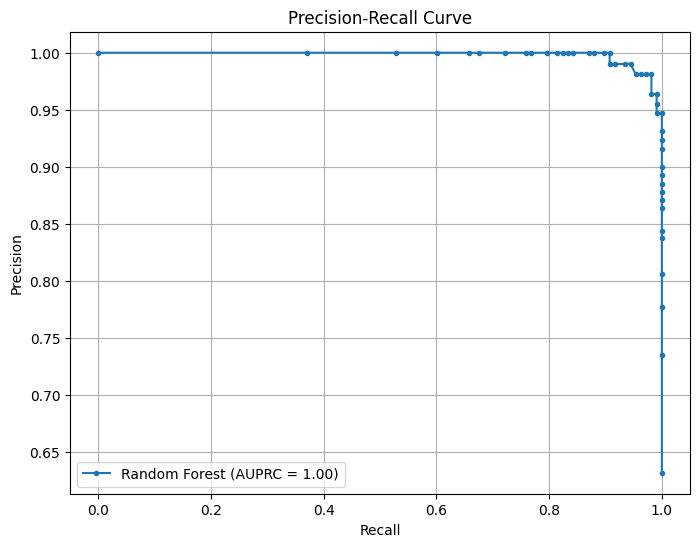

Area Under the Precision-Recall Curve (AUPRC): 0.9982


In [28]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Random Forest (AUPRC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Area Under the Precision-Recall Curve (AUPRC): {pr_auc:.4f}")


In [29]:
#44.  Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

final_estimator = LogisticRegression(random_state=42)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier (RF + LR) Accuracy:", accuracy_stacking)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

print("\nComparison of Accuracies:")
print(f"Random Forest: {accuracy_rf:.4f}")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"Stacking Classifier (RF + LR): {accuracy_stacking:.4f}")


Stacking Classifier (RF + LR) Accuracy: 1.0
Random Forest Classifier Accuracy: 1.0
Logistic Regression Accuracy: 1.0

Comparison of Accuracies:
Random Forest: 1.0000
Logistic Regression: 1.0000
Stacking Classifier (RF + LR): 1.0000


Comparing Bagging Regressor performance with different numbers of bootstrap samples (n_estimators):
  Number of bootstrap samples = 10: Mean Squared Error = 0.2862
  Number of bootstrap samples = 50: Mean Squared Error = 0.2579
  Number of bootstrap samples = 100: Mean Squared Error = 0.2568
  Number of bootstrap samples = 200: Mean Squared Error = 0.2542
  Number of bootstrap samples = 500: Mean Squared Error = 0.2527


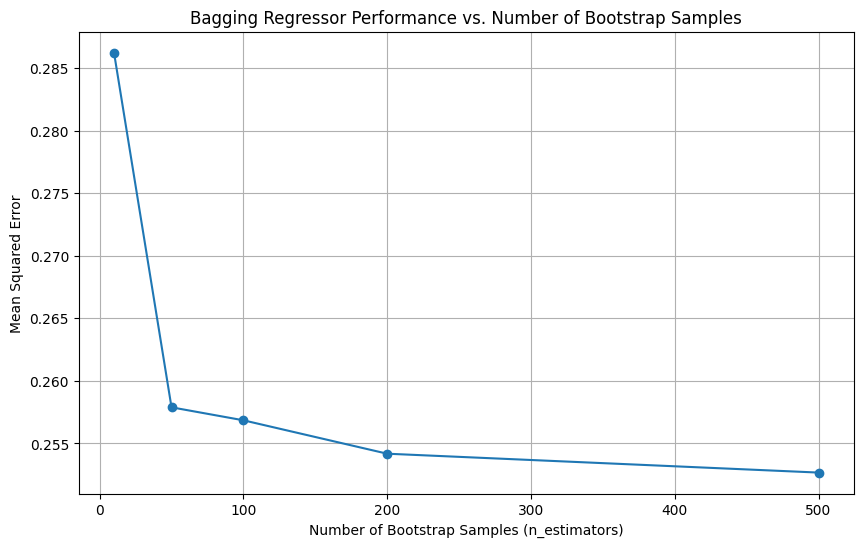


Summary of Mean Squared Error Scores:
  10 bootstrap samples: 0.2862
  50 bootstrap samples: 0.2579
  100 bootstrap samples: 0.2568
  200 bootstrap samples: 0.2542
  500 bootstrap samples: 0.2527


In [30]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]
mse_scores = {}

print("Comparing Bagging Regressor performance with different numbers of bootstrap samples (n_estimators):")
for n_estimators in n_estimators_list:

  bagging_reg = BaggingRegressor(
      estimator=DecisionTreeRegressor(),
      n_estimators=n_estimators,
      random_state=42
  )


  bagging_reg.fit(X_train, y_train)

  y_pred = bagging_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_scores[n_estimators] = mse
  print(f"  Number of bootstrap samples = {n_estimators}: Mean Squared Error = {mse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(list(mse_scores.keys()), list(mse_scores.values()), marker='o')
plt.title("Bagging Regressor Performance vs. Number of Bootstrap Samples")
plt.xlabel("Number of Bootstrap Samples (n_estimators)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print("\nSummary of Mean Squared Error Scores:")
for n_estimators, mse in mse_scores.items():
  print(f"  {n_estimators} bootstrap samples: {mse:.4f}")
